# Pitch Analysis

Please submit a coherent, readable notebookthat walks Dhrumil and Aishi through the exploratory data analysis and regression analysis you've done in pursuit of your story.

This notebook should be clean and focused:

- move any code for data acquisition or scraping into it's own notebook with a name like `scraping.ipynb`
- move any code for data cleaning and maniupualtion into it's own notebook with a name like `cleaning.ipynb`
- you may even want to make a notebook called `scratchpad.ipynb` to keep your messy analysis, you can carefully move the relevant parts to `analysis.ipynb` and make sure it's written in such a way that Dhrumil and Aishi can follow your logic
    - add text to guide a reader through this notebook, you may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts.
- make sure `analysis.ipynb` runs (restart and run all cells) from top to bottom without errors


## Setup

This section contains our standard notebook setup, including Python and R Imports. You can zoom right past this! 


In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings


During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

R imports

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Python imports

In [ ]:
# installs any python packages in requirements.txt
!pip install -r requirements.txt

In [4]:
# Python imports for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Loading The Data

_Load the cleaned data here. You're welcome to load multiple dataframes if that makes sense._
- _What is each row? Make sure to explain if it's not obvious._
- _Make sure to mention any caveats of the data we need to be aware of._
- _Make mention of any methodological choices you made in `cleaning.ipynb` that you think are relevant._
- _Display a small chunk of the data with something like `df.head()` or df.sample(5)`, so that we have an idea of what we're working with._


In [10]:
# your code to load and display the data
df = pd.read_csv("Borough-wise-regression-analysis /data/final_df.csv")
# drop the "Unnamed: 0" column
df.drop(columns=['Unnamed: 0'], inplace=True)
df

FileNotFoundError: [Errno 2] No such file or directory: 'Borough-wise-regression-analysis /data/final_df.csv'

Here, each row is a Borough where we have total storefronts, median rent, median square feet, and the number of vacant stores. We also have other economic indicators like unemployment rate, median income, and poverty rate. We also have the storefront density.

## Exploratory Analysis

_In the cells below, guide us through your exploratory data analysis. You may include charts and regressions as you see fit._


_You may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts. You can make a separate `scratchpad.ipynb` to store analysis that you were trying out but isn't ultimately relevant to your pitch. You don't need to rewrite your pitch here, but please make sure to include enough text for Dhrumil and Aishi to be able to follow your logic._

In [9]:
%%R

# Read the cleaned CSV file with quarters into a data frame
data <- read.csv("final_df.csv")

In [10]:
%%R 

data

     X Reporting.Year
1 3083           2021
2 3084           2021
3 3085           2021
4 3086           2021
5 3087           2021
  Aggregate.Level..Citywide..Borough..Council.District..Census.Tract.
1                                                             Borough
2                                                             Borough
3                                                             Borough
4                                                             Borough
5                                                             Borough
  Aggregate.Level.ID Total..Storefronts Median.Square.Feet
1          Manhattan              23776             1275.0
2              Bronx               8391             1000.0
3           Brooklyn              14483             1268.0
4             Queens              13068             1250.0
5      Staten Island               2348             1539.5
  Median.Monthly.Rent.Per.Square.Foot VACANT.STOREFRONTS X..Vacant
1                          

In [15]:
%%R

options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

data



     X Reporting.Year
1 3083           2021
2 3084           2021
3 3085           2021
4 3086           2021
5 3087           2021
  Aggregate.Level..Citywide..Borough..Council.District..Census.Tract.
1                                                             Borough
2                                                             Borough
3                                                             Borough
4                                                             Borough
5                                                             Borough
  Aggregate.Level.ID Total..Storefronts Median.Square.Feet
1          Manhattan              23776             1275.0
2              Bronx               8391             1000.0
3           Brooklyn              14483             1268.0
4             Queens              13068             1250.0
5      Staten Island               2348             1539.5
  Median.Monthly.Rent.Per.Square.Foot VACANT.STOREFRONTS X..Vacant
1                          

In [14]:
%%R

colnames(data)

 [1] "X"                                                                  
 [2] "Reporting.Year"                                                     
 [3] "Aggregate.Level..Citywide..Borough..Council.District..Census.Tract."
 [4] "Aggregate.Level.ID"                                                 
 [5] "Total..Storefronts"                                                 
 [6] "Median.Square.Feet"                                                 
 [7] "Median.Monthly.Rent.Per.Square.Foot"                                
 [8] "VACANT.STOREFRONTS"                                                 
 [9] "X..Vacant"                                                          
[10] "Median.Household.Income"                                            
[11] "Unemployment.Rate"                                                  
[12] "Land.Area.in.Square.Miles"                                          
[13] "Storefront.Density"                                                 


Is there a relationship between the number of Vacancy Rate and Median Rent in NYC?

In [16]:
%%R

#Fit the linear regression model to see if there is relationship between X..Vacant and Median.Monthly.Rent.Per.Square.Foot

model <- lm(`X..Vacant` ~ Median.Monthly.Rent.Per.Square.Foot, data=data)

In [17]:
%%R
summary(model)


Call:
lm(formula = X..Vacant ~ Median.Monthly.Rent.Per.Square.Foot, 
    data = data)

Residuals:
       1        2        3        4        5 
 0.08458 -2.00610  1.31796 -0.79286  1.39642 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)                           4.1774     1.9938   2.095   0.1271  
Median.Monthly.Rent.Per.Square.Foot   1.2085     0.4138   2.920   0.0615 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.668 on 3 degrees of freedom
Multiple R-squared:  0.7398,	Adjusted R-squared:  0.653 
F-statistic: 8.528 on 1 and 3 DF,  p-value: 0.06148



`geom_smooth()` using formula = 'y ~ x'


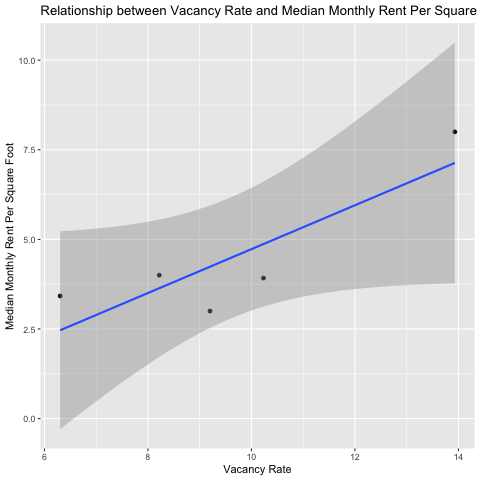

In [25]:
%%R 

#Make a scatter plot of X..Vacant and Median.Monthly.Rent.Per.Square.Foot

ggplot(data, aes(x=`X..Vacant`, y=`Median.Monthly.Rent.Per.Square.Foot`)) + 
    geom_point() + 
    geom_smooth(method=lm) +
    labs(title="Relationship between Vacancy Rate and Median Monthly Rent Per Square Foot", x="Vacancy Rate", y="Median Monthly Rent Per Square Foot")


question 2: Is there a relationship between Vacancy Rate and Median Income in NYC?

In [26]:
%%R

#Fit the linear regression model to see if there is relationship between X..Vacant and Median.Household.Income

model <- lm(`X..Vacant` ~ Median.Household.Income, data=data)


In [27]:
%%R
summary(model)


Call:
lm(formula = X..Vacant ~ Median.Household.Income, data = data)

Residuals:
       1        2        3        4        5 
 2.78999 -0.06402  1.03569 -1.63446 -2.12720 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             1.414e+00  4.831e+00   0.293    0.789
Median.Household.Income 1.152e-04  6.658e-05   1.730    0.182

Residual standard error: 2.314 on 3 degrees of freedom
Multiple R-squared:  0.4994,	Adjusted R-squared:  0.3326 
F-statistic: 2.993 on 1 and 3 DF,  p-value: 0.1821



`geom_smooth()` using formula = 'y ~ x'


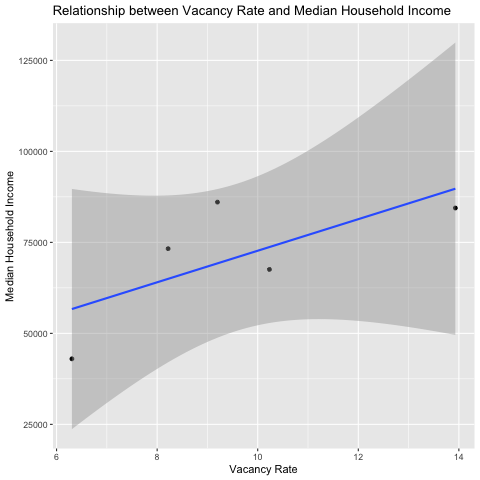

In [29]:
%%R
#Make a scatter plot of X..Vacant and Median.Household.Income

ggplot(data, aes(x=`X..Vacant`, y=`Median.Household.Income`)) +
    geom_point() +
    geom_smooth(method=lm) +
    labs(title="Relationship between Vacancy Rate and Median Household Income", x="Vacancy Rate", y="Median Household Income")

question 3: Is there a relationship between Vacancy Rate and Median.Square.Feet?

In [30]:
%%R

#Fit the linear regression model to see if there is relationship between X..Vacant and Median.Square.Feet

model <- lm(`X..Vacant` ~ Median.Square.Feet, data=data)
summary(model)




Call:
lm(formula = X..Vacant ~ Median.Square.Feet, data = data)

Residuals:
      1       2       3       4       5 
 4.3047 -1.7575  0.6472 -1.2646 -1.9297 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)         2.376794  10.104219   0.235    0.829
Median.Square.Feet  0.005685   0.007906   0.719    0.524

Residual standard error: 3.02 on 3 degrees of freedom
Multiple R-squared:  0.147,	Adjusted R-squared:  -0.1373 
F-statistic: 0.517 on 1 and 3 DF,  p-value: 0.5241



`geom_smooth()` using formula = 'y ~ x'


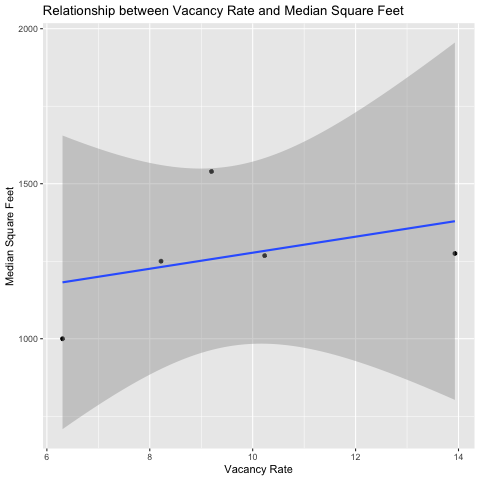

In [31]:
%%R
#Make a scatter plot of X..Vacant and Median.Square.Feet

ggplot(data, aes(x=`X..Vacant`, y=`Median.Square.Feet`)) +
    geom_point() +  
    geom_smooth(method=lm) +
    labs(title="Relationship between Vacancy Rate and Median Square Feet", x="Vacancy Rate", y="Median Square Feet")

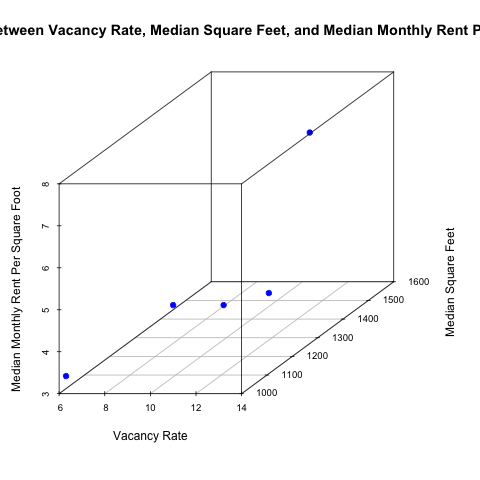

In [33]:
%%R
#create a 3d scatter plot of X..Vacant, Median.Square.Feet, and Median.Monthly.Rent.Per.Square.Foot

library(scatterplot3d)


scatterplot3d(data$`X..Vacant`, data$`Median.Square.Feet`, data$`Median.Monthly.Rent.Per.Square.Foot`,
                main="Relationship between Vacancy Rate, Median Square Feet, and Median Monthly Rent Per Square Foot",
                xlab="Vacancy Rate", ylab="Median Square Feet", zlab="Median Monthly Rent Per Square Foot",
                pch=19, color="blue")



In [37]:
%%R
#Now we see if there is any relationship between X..Vacant and Storefront.Density

model <- lm(`X..Vacant` ~ Storefront.Density, data=data)
summary(model)


Call:
lm(formula = X..Vacant ~ Storefront.Density, data = data)

Residuals:
      1       2       3       4       5 
 0.2125 -2.5790  1.3249 -0.2017  1.2433 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)        7.725328   1.090790   7.082  0.00579 **
Storefront.Density 0.005797   0.002259   2.566  0.08276 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.829 on 3 degrees of freedom
Multiple R-squared:  0.687,	Adjusted R-squared:  0.5827 
F-statistic: 6.586 on 1 and 3 DF,  p-value: 0.08276



`geom_smooth()` using formula = 'y ~ x'


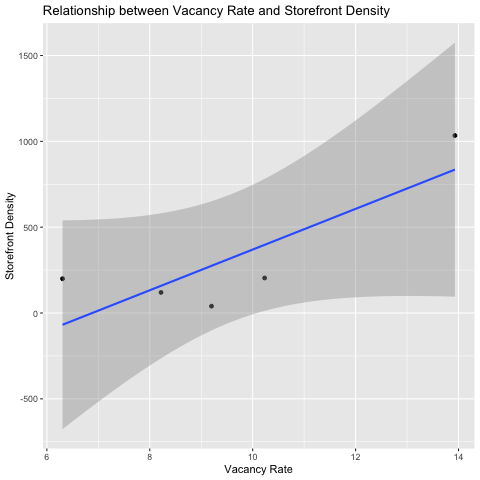

In [38]:

%%R
#Make a scatter plot of X..Vacant and Storefront.Density

ggplot(data, aes(x=`X..Vacant`, y=`Storefront.Density`)) +
    geom_point() +
    geom_smooth(method=lm) +
    labs(title="Relationship between Vacancy Rate and Storefront Density", x="Vacancy Rate", y="Storefront Density")



 "X"                                                                  
 [2] "Reporting.Year"                                                     
 [3] "Aggregate.Level..Citywide..Borough..Council.District..Census.Tract."
 [4] "Aggregate.Level.ID"                                                 
 [5] "Total..Storefronts"                                                 
 [6] "Median.Square.Feet"                                                 
 [7] "Median.Monthly.Rent.Per.Square.Foot"                                
 [8] "VACANT.STOREFRONTS"                                                 
 [9] "X..Vacant"                                                          
[10] "Median.Household.Income"                                            
[11] "Unemployment.Rate"                                                  
[12] "Land.Area.in.Square.Miles"                                          
[13] "Storefront.Density"      

In [41]:
%%R
#Now we see if there is any relationship between X..Vacant and Median.Household.Income

model <- lm(`X..Vacant` ~ `Median.Household.Income`, data=data)
summary(model)



Call:
lm(formula = X..Vacant ~ Median.Household.Income, data = data)

Residuals:
       1        2        3        4        5 
 2.78999 -0.06402  1.03569 -1.63446 -2.12720 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             1.414e+00  4.831e+00   0.293    0.789
Median.Household.Income 1.152e-04  6.658e-05   1.730    0.182

Residual standard error: 2.314 on 3 degrees of freedom
Multiple R-squared:  0.4994,	Adjusted R-squared:  0.3326 
F-statistic: 2.993 on 1 and 3 DF,  p-value: 0.1821



`geom_smooth()` using formula = 'y ~ x'


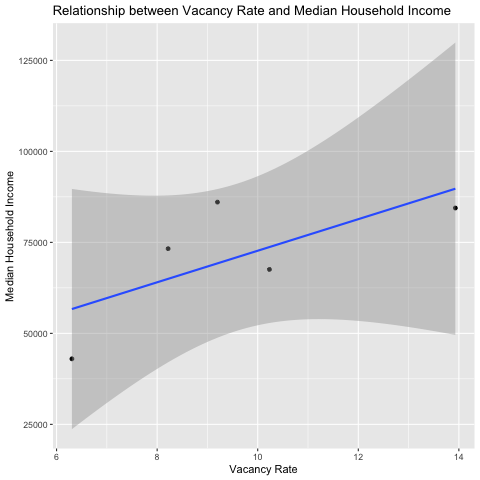

In [42]:
%%R

#Make a scatter plot of X..Vacant and Median.Household.Income

ggplot(data, aes(x=`X..Vacant`, y=`Median.Household.Income`)) +
    geom_point() +
    geom_smooth(method=lm) +
    labs(title="Relationship between Vacancy Rate and Median Household Income", x="Vacancy Rate", y="Median Household Income")

    